### **Uczenie Maszynowe, Laboratoria 4 - Cross-Entropy**
### - inicjalizacja polityki, funkcja generowania sesji



---


*Aut. skryptu: Agnieszka Łysak, 29.03.2021*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(4, 3))

<Figure size 288x216 with 0 Axes>

<Figure size 288x216 with 0 Axes>

In [2]:
import gym

env = gym.make("Taxi-v3").env
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
env.action_space

Discrete(6)

In [4]:
env.observation_space

Discrete(500)

In [5]:
env.P
env.P[199]

{0: [(1.0, 299, -1, False)],
 1: [(1.0, 99, -1, False)],
 2: [(1.0, 199, -1, False)],
 3: [(1.0, 179, -1, False)],
 4: [(1.0, 199, -10, False)],
 5: [(1.0, 199, -10, False)]}

In [6]:
env.step(2)
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


In [7]:
for t in range(200):
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  print(t, observation, reward, done)

0 481 -10 False
1 481 -10 False
2 461 -1 False
3 461 -1 False
4 361 -1 False
5 361 -1 False
6 361 -1 False
7 361 -10 False
8 361 -10 False
9 261 -1 False
10 261 -10 False
11 281 -1 False
12 281 -10 False
13 281 -10 False
14 381 -1 False
15 481 -1 False
16 481 -10 False
17 481 -1 False
18 481 -10 False
19 381 -1 False
20 281 -1 False
21 281 -10 False
22 281 -1 False
23 281 -10 False
24 281 -1 False
25 281 -1 False
26 281 -10 False
27 281 -10 False
28 181 -1 False
29 161 -1 False
30 61 -1 False
31 61 -10 False
32 81 -1 False
33 181 -1 False
34 161 -1 False
35 161 -10 False
36 141 -1 False
37 241 -1 False
38 241 -10 False
39 341 -1 False
40 321 -1 False
41 321 -1 False
42 321 -10 False
43 321 -1 False
44 221 -1 False
45 201 -1 False
46 101 -1 False
47 101 -1 False
48 101 -1 False
49 121 -1 False
50 121 -10 False
51 121 -10 False
52 101 -1 False
53 101 -10 False
54 201 -1 False
55 301 -1 False
56 301 -1 False
57 301 -1 False
58 301 -10 False
59 301 -1 False
60 301 -1 False
61 301 -1 False


In [8]:
for t in range(199):
  action = env.action_space.sample()
  observation, reward, done, info = env.step(action)
  env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : 

In [9]:
n_states = env.observation_space.n
n_actions = env.action_space.n

In [10]:
def initialize_policy(n_states, n_actions):
  
    policy = np.zeros(shape=(n_states, n_actions)) +  1/n_actions
    
    return policy

policy = initialize_policy(n_states, n_actions)

In [11]:
total_reward = 0.
observation = env.reset()

for t in range(200):

  action = np.random.choice(n_actions, p = [1./n_actions, 1./n_actions, 1./n_actions, 1./n_actions, 1./n_actions, 1./n_actions])
  
  new_observation, reward, done, info = env.step(action)

  total_reward += reward
  
  if done:
    break

  print(t, total_reward, done)
  env.render()

0 -10.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
1 -11.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
2 -21.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
3 -22.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
4 -23.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
5 -24.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
6 -34.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
7 -35.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
8 -45.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
9 -46.0 False
+---------+

In [12]:
def generate_session(env, policy, t_max = 5000):
  
  observations, actions = [], []
  total_reward = 0.
  observation = env.reset()
  
  for t in range(t_max):
    
    action = np.random.choice(n_actions, p = policy[observation])

    new_observation, reward, done, info = env.step(action)

    observations.append(observation)
    actions.append(action)
    total_reward += reward

    observation = new_observation
    if done:
        break

  return observations, actions, total_reward

In [13]:
observations, actions, total_reward = generate_session(env, policy)
print(len(observations), len(actions), total_reward)
print(observations)
print(actions)
print(total_reward)
env.render()

733 733 -2647.0
[26, 26, 26, 26, 26, 26, 26, 26, 6, 26, 126, 126, 226, 226, 206, 206, 206, 206, 226, 126, 126, 106, 106, 106, 206, 226, 226, 206, 206, 226, 126, 26, 26, 26, 26, 26, 26, 6, 106, 6, 26, 126, 126, 226, 226, 226, 246, 226, 126, 126, 26, 26, 126, 26, 126, 106, 106, 206, 106, 106, 206, 306, 306, 206, 206, 206, 226, 206, 206, 226, 226, 126, 126, 126, 126, 106, 6, 6, 106, 106, 126, 126, 26, 26, 26, 26, 26, 26, 126, 126, 126, 126, 106, 206, 226, 246, 266, 266, 286, 266, 266, 166, 66, 66, 66, 66, 86, 186, 186, 86, 186, 186, 286, 286, 386, 386, 386, 386, 386, 366, 386, 386, 386, 486, 486, 486, 486, 486, 466, 366, 466, 366, 366, 366, 366, 386, 386, 486, 486, 486, 486, 486, 486, 486, 386, 386, 286, 286, 286, 286, 266, 266, 286, 266, 366, 366, 386, 386, 386, 366, 366, 386, 486, 486, 486, 486, 466, 466, 466, 486, 466, 466, 466, 466, 466, 466, 466, 466, 366, 366, 466, 466, 366, 266, 266, 366, 386, 386, 386, 386, 486, 486, 486, 486, 486, 486, 486, 486, 466, 466, 466, 466, 366, 266, 166,

In [14]:
# Źródła:
# [1] Yandex Data School, "Crossentropy Method", Github, https://github.com/yandexdataschool/Practical_RL/blob/master/week01_intro/crossentropy_method.ipynb

In [15]:
def select_elites(observations_batch, actions_batch, total_reward_batch, percentile):

  reward_treshold = np.percentile(total_reward_batch, percentile)

  elite_observations = []
  elite_actions = []

  for i in range(len(total_reward_batch)):
    if total_reward_batch[i] >= reward_treshold:
      elite_observations += (observations_batch[i])
      elite_actions += (actions_batch[i])

  return elite_observations, elite_actions

In [16]:
sessions = [generate_session(env, policy) for i in range(5)]
observations_batch, actions_batch, total_reward_batch = zip(*sessions)

print(sessions)
print(observations_batch)
print(actions_batch)
print(total_reward_batch)

[([107, 107, 107, 7, 7, 7, 7, 7, 7, 27, 27, 27, 27, 27, 7, 7, 107, 107, 207, 307, 307, 307, 307, 207, 107, 107, 107, 127, 127, 107, 107, 107, 107, 107, 207, 207, 207, 207, 207, 107, 7, 7, 7, 107, 207, 107, 207, 207, 227, 247, 147, 167, 147, 47, 47, 47, 47, 47, 47, 47, 47, 147, 167, 147, 167, 167, 167, 67, 167, 187, 187, 87, 99, 199, 199, 179, 179, 79, 79, 79, 99, 199, 179, 159, 159, 59, 59, 59, 79, 79, 79, 79, 79, 179, 279, 259, 359, 259, 259, 359, 359, 259, 239, 339, 339, 339, 339, 359, 359, 259, 159, 159, 159, 59, 159, 59, 159, 259, 359, 259, 239, 239, 239, 339, 339, 339, 439, 439, 339, 359, 359, 359, 359, 459, 359, 359, 259, 259, 259, 239, 239, 259, 279, 179, 179, 159, 159, 179, 79, 79, 59, 159, 179, 279, 179, 179, 159, 159, 179, 179, 159, 159, 159, 179, 179, 179, 179, 179, 199, 299, 199, 179, 199, 199, 199, 199, 179, 79, 59, 159, 159, 259, 259, 239, 239, 219, 119, 139, 139, 119, 219, 219, 319, 319, 319, 319, 219, 219, 219, 119, 119, 119, 219, 119, 119, 119, 119, 119, 19, 119, 219, 

In [17]:
percentile = 80

elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)
print(elite_observations)
print(elite_actions)
print(len(elite_observations))
print(len(elite_actions))

[107, 107, 107, 7, 7, 7, 7, 7, 7, 27, 27, 27, 27, 27, 7, 7, 107, 107, 207, 307, 307, 307, 307, 207, 107, 107, 107, 127, 127, 107, 107, 107, 107, 107, 207, 207, 207, 207, 207, 107, 7, 7, 7, 107, 207, 107, 207, 207, 227, 247, 147, 167, 147, 47, 47, 47, 47, 47, 47, 47, 47, 147, 167, 147, 167, 167, 167, 67, 167, 187, 187, 87, 99, 199, 199, 179, 179, 79, 79, 79, 99, 199, 179, 159, 159, 59, 59, 59, 79, 79, 79, 79, 79, 179, 279, 259, 359, 259, 259, 359, 359, 259, 239, 339, 339, 339, 339, 359, 359, 259, 159, 159, 159, 59, 159, 59, 159, 259, 359, 259, 239, 239, 239, 339, 339, 339, 439, 439, 339, 359, 359, 359, 359, 459, 359, 359, 259, 259, 259, 239, 239, 259, 279, 179, 179, 159, 159, 179, 79, 79, 59, 159, 179, 279, 179, 179, 159, 159, 179, 179, 159, 159, 159, 179, 179, 179, 179, 179, 199, 299, 199, 179, 199, 199, 199, 199, 179, 79, 59, 159, 159, 259, 259, 239, 239, 219, 119, 139, 139, 119, 219, 219, 319, 319, 319, 319, 219, 219, 219, 119, 119, 119, 219, 119, 119, 119, 119, 119, 19, 119, 219, 23

In [18]:
def update_policy(elite_observations, elite_actions):
    policy_updated = policy

    elite_observations_unique = set(elite_observations)
    actions_count = {observation:[0] * n_actions for observation in elite_observations_unique}
    for observation, action in zip(elite_observations, elite_actions):
        actions_count[observation][action] += 1
    for observation in elite_observations_unique:
        policy_updated[observation] = np.array(actions_count[observation]) / np.sum(actions_count[observation])
    return policy_updated

In [19]:
elite_observations_unique = set(elite_observations)
print(elite_observations)
print(len(elite_observations))
print(elite_observations_unique)
print(len(elite_observations_unique))

[107, 107, 107, 7, 7, 7, 7, 7, 7, 27, 27, 27, 27, 27, 7, 7, 107, 107, 207, 307, 307, 307, 307, 207, 107, 107, 107, 127, 127, 107, 107, 107, 107, 107, 207, 207, 207, 207, 207, 107, 7, 7, 7, 107, 207, 107, 207, 207, 227, 247, 147, 167, 147, 47, 47, 47, 47, 47, 47, 47, 47, 147, 167, 147, 167, 167, 167, 67, 167, 187, 187, 87, 99, 199, 199, 179, 179, 79, 79, 79, 99, 199, 179, 159, 159, 59, 59, 59, 79, 79, 79, 79, 79, 179, 279, 259, 359, 259, 259, 359, 359, 259, 239, 339, 339, 339, 339, 359, 359, 259, 159, 159, 159, 59, 159, 59, 159, 259, 359, 259, 239, 239, 239, 339, 339, 339, 439, 439, 339, 359, 359, 359, 359, 459, 359, 359, 259, 259, 259, 239, 239, 259, 279, 179, 179, 159, 159, 179, 79, 79, 59, 159, 179, 279, 179, 179, 159, 159, 179, 179, 159, 159, 159, 179, 179, 179, 179, 179, 199, 299, 199, 179, 199, 199, 199, 199, 179, 79, 59, 159, 159, 259, 259, 239, 239, 219, 119, 139, 139, 119, 219, 219, 319, 319, 319, 319, 219, 219, 219, 119, 119, 119, 219, 119, 119, 119, 119, 119, 19, 119, 219, 23

In [20]:
actions_count = {observation:[0] * n_actions for observation in elite_observations_unique}
print(actions_count)
print(len(actions_count))

{259: [0, 0, 0, 0, 0, 0], 7: [0, 0, 0, 0, 0, 0], 139: [0, 0, 0, 0, 0, 0], 399: [0, 0, 0, 0, 0, 0], 147: [0, 0, 0, 0, 0, 0], 19: [0, 0, 0, 0, 0, 0], 279: [0, 0, 0, 0, 0, 0], 27: [0, 0, 0, 0, 0, 0], 159: [0, 0, 0, 0, 0, 0], 167: [0, 0, 0, 0, 0, 0], 39: [0, 0, 0, 0, 0, 0], 299: [0, 0, 0, 0, 0, 0], 47: [0, 0, 0, 0, 0, 0], 307: [0, 0, 0, 0, 0, 0], 179: [0, 0, 0, 0, 0, 0], 439: [0, 0, 0, 0, 0, 0], 187: [0, 0, 0, 0, 0, 0], 59: [0, 0, 0, 0, 0, 0], 319: [0, 0, 0, 0, 0, 0], 67: [0, 0, 0, 0, 0, 0], 199: [0, 0, 0, 0, 0, 0], 459: [0, 0, 0, 0, 0, 0], 207: [0, 0, 0, 0, 0, 0], 79: [0, 0, 0, 0, 0, 0], 339: [0, 0, 0, 0, 0, 0], 87: [0, 0, 0, 0, 0, 0], 119: [0, 0, 0, 0, 0, 0], 219: [0, 0, 0, 0, 0, 0], 479: [0, 0, 0, 0, 0, 0], 227: [0, 0, 0, 0, 0, 0], 99: [0, 0, 0, 0, 0, 0], 359: [0, 0, 0, 0, 0, 0], 107: [0, 0, 0, 0, 0, 0], 239: [0, 0, 0, 0, 0, 0], 499: [0, 0, 0, 0, 0, 0], 247: [0, 0, 0, 0, 0, 0], 379: [0, 0, 0, 0, 0, 0], 127: [0, 0, 0, 0, 0, 0]}
38


In [21]:
  for observation, action in zip(elite_observations, elite_actions):
    actions_count[observation][action] += 1
  
  print(actions_count)
  print(len(actions_count))

{259: [6, 3, 3, 7, 3, 3], 7: [2, 2, 1, 1, 0, 5], 139: [5, 5, 3, 4, 3, 5], 399: [2, 1, 2, 3, 2, 1], 147: [0, 1, 3, 0, 0, 0], 19: [5, 4, 3, 0, 0, 0], 279: [3, 2, 1, 4, 2, 3], 27: [0, 0, 1, 1, 1, 2], 159: [2, 3, 6, 2, 4, 3], 167: [0, 1, 1, 2, 1, 1], 39: [4, 7, 5, 4, 3, 9], 299: [1, 3, 2, 2, 0, 0], 47: [1, 2, 0, 0, 4, 1], 307: [0, 1, 1, 0, 2, 0], 179: [3, 5, 6, 4, 6, 7], 439: [12, 6, 5, 4, 6, 2], 187: [0, 1, 0, 0, 1, 0], 59: [4, 0, 1, 0, 1, 1], 319: [0, 2, 0, 0, 0, 3], 67: [1, 0, 0, 0, 0, 0], 199: [4, 1, 2, 6, 3, 1], 459: [12, 5, 12, 5, 8, 15], 207: [1, 3, 1, 2, 2, 1], 79: [4, 5, 1, 2, 2, 0], 339: [6, 5, 7, 5, 5, 6], 87: [0, 0, 0, 0, 1, 0], 119: [5, 4, 6, 7, 6, 9], 219: [2, 6, 3, 6, 2, 0], 479: [1, 2, 2, 0, 3, 1], 227: [0, 0, 1, 0, 0, 0], 99: [2, 1, 0, 1, 0, 0], 359: [5, 9, 4, 4, 6, 10], 107: [4, 2, 1, 0, 5, 4], 239: [8, 4, 4, 4, 5, 8], 499: [0, 2, 1, 2, 1, 1], 247: [0, 1, 0, 0, 0, 0], 379: [3, 2, 3, 2, 4, 2], 127: [0, 0, 0, 1, 1, 0]}
38


In [22]:
  for observation, action in zip(elite_observations, elite_actions):
    actions_count[observation][action] += 1
  
  print(actions_count[observation])
  print(np.array(actions_count[observation]))
  print(np.sum(actions_count[observation]))

[2, 4, 4, 0, 6, 2]
[2 4 4 0 6 2]
18


In [23]:
policy_updated = update_policy(elite_observations, elite_actions)
policy_updated

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.        , 0.28571429, 0.14285714, 0.28571429, 0.14285714,
        0.14285714]])

In [24]:
print(policy_updated)

[[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 ...
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.         0.28571429 0.14285714 0.28571429 0.14285714 0.14285714]]


In [25]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile):
  mean_reward = np.mean(rewards_batch)
  treshold = np.percentile(rewards_batch, percentile)
  log.append([mean_reward, treshold])

  plt.figure(figsize=[8, 4])
  plt.plot(list(zip(*log))[0], label = "Mean reward")
  plt.plot(list(zip(*log))[1], label = "Reward treshold")
  plt.legend()
  plt.grid()

  clear_output(True)
  print("mean reward:", mean_reward)
  print("treshold:", treshold)
  plt.show()

In [26]:
env.reset()
policy = initialize_policy(n_states, n_actions)

mean reward: -5.95
treshold: 6.0


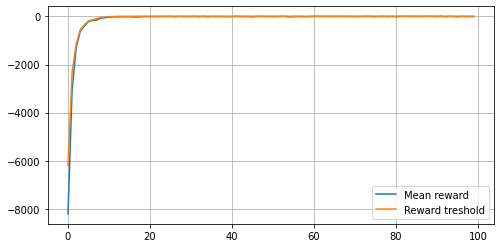

In [27]:
n_sessions = 100
percentile = 50
learning_rate = 0.5

log = []

for i in range(100):
  sessions = [generate_session(env, policy, t_max = 5000) for i in range(n_sessions)]
  observations_batch, actions_batch, total_reward_batch = zip(*sessions)
  elite_observations, elite_actions = select_elites(observations_batch, actions_batch, total_reward_batch, percentile)
  policy_updated = update_policy(elite_observations, elite_actions)
  policy = learning_rate * policy_updated + (1 - learning_rate) * policy
  show_progress(total_reward_batch, log, percentile)


In [28]:
policy

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.28571429, 0.28571429, 0.28571429, 0.        ,
        0.        ]])

In [30]:
total_reward = 0.
observation = env.reset()

for t in range(200):

  action = np.random.choice(n_actions, p = policy[observation])
  
  new_observation, reward, done, info = env.step(action)
  observation = new_observation

  total_reward += reward
  
  if done:
    break

  print(t, total_reward, done)
  env.render()

0 -1.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
1 -2.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
2 -3.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
3 -4.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (East)
4 -5.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (North)
5 -6.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (North)
6 -7.0 False
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
7 -8.0 False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
